In [ ]:
# import libraries -- pip install if not available

import tweepy
import configparser
import csv
import pandas as pd
from wordcloud import WordCloud

In [ ]:
#read configs -- setup ini file using API credentials

config = configparser.ConfigParser()
config.read("config_example.ini")



['config.ini']

In [ ]:
api_key = config["twitter"]["api_key"]
api_key_secret = config["twitter"]["api_key_secret"]

access_token = config["twitter"]["access_token"]
access_token_secret = config["twitter"]["access_token_secret"]

In [ ]:
#authentication handler

auth = tweepy.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, access_token_secret)

In [ ]:

api = tweepy.API(auth)

In [ ]:
# An example getting hashtags in london

# WOEID of London
woeid = 44418
 
# fetching the trends
trends = api.get_place_trends(id = woeid)
 
# printing the information
print("The top trends for the location are :")
 
for value in trends:
    for trend in value['trends']:
        print(trend['name'])

The top trends for the location are :
Zaha
#MAFSAU
Dennis
#WorldCup
hobi
#Sorare
Proven
PS Plus
Jordan Peterson
Abuja
East London
No 10
Game Pass
Number 10
#MoonKnight
Keir
Rayner
The PM
PS Now
Westminster Abbey
The Met
Sue Gray
Prince Harry
Ghana
Mings
Ivory Coast
Ighalo
Musa
Craig Gordon
Senegal
Osimhen
Jackie Weaver
Watkins
Kyrgios
Bellingham
Matt Hancock
Snow Patrol
Lookman
Ryan Jack
Moses Simon
Jollof
Bassey
Lebedev
Andrew
AFCON
Jac Naylor
Super Eagles
Sinner
Ekong


In [ ]:
# Get tweet using api.seaarch_tweets

tweets = [page for page in tweepy.Cursor(api.search_tweets, q ="south africa -filter:RT", lang = "en",
                                          result_type = "mixed",
                                          count = 20).pages(120)]# Open/create a file to append data to


In [ ]:
csvFile = open('result.csv', 'a')
#Use csv writer
csvWriter = csv.writer(csvFile, delimiter = ",")
csvWriter.writerow(["id","retweet_count",
                    "date_created",
                    "tweet"])
for page in tweets:
    for tweet in page:
        csvWriter.writerow([tweet.id,tweet.retweet_count,
                            tweet.created_at, 
                            tweet.text.encode('utf-8')])
    

In [ ]:
    
csvFile.close()

In [ ]:
data = pd.read_csv("result.csv")
data.head(10)

,id,retweet_count,date_created,tweet
0,1508758968482635778,1092,2022-03-29 10:52:24+00:00,b'A 31-year-old Ugandan traditional healer liv...
1,1508661904192913410,2275,2022-03-29 04:26:42+00:00,"b'Date mein kya rakha hai?\nMarch 29th, a very..."
2,1508815292578816015,563,2022-03-29 14:36:12+00:00,b'Moeletsi Mbeki has accused South Africa\xe2\...
3,1509067192888926208,9,2022-03-30 07:17:10+00:00,"b""RT @ThamiMasemola: Isuzu Motors South Africa..."
4,1509067189827026945,0,2022-03-30 07:17:09+00:00,"b'SAFA President, ANC Dr Danny Jordaan \n\nIs ..."
5,1509067166997381124,0,2022-03-30 07:17:04+00:00,"b""@GicAriana Russia's circumstances sound like..."
6,1509067135917740034,0,2022-03-30 07:16:56+00:00,"b""'It's our sun': Rural South Africans seek gr..."
7,1509067135582093313,146,2022-03-30 07:16:56+00:00,b'RT @Biophonlk: South Africa getting beaten b...
8,1509067083677638659,0,2022-03-30 07:16:44+00:00,b'@MsiziNgema11 @Rockas_N @54Battalion Nigeria...
9,1509067082322874371,1,2022-03-30 07:16:44+00:00,b'RT @BAFTA: Nominated for Titles &amp; Graphi...


In [ ]:
data.tail()

,id,retweet_count,date_created,tweet
2398,1508574526937907201,204,2022-03-28 22:39:29+00:00,b'RT @ProgIntl: BREAKING: The Government of Me...
2399,1508574524228268033,11,2022-03-28 22:39:29+00:00,"b""RT @NKWK_NFT: \xf0\x9f\xa6\x81 #GIVEAWAY \xf..."
2400,1508574519476293632,0,2022-03-28 22:39:28+00:00,b'@bobbyhundreds @AdamBombSquad @BenHundreds I...
2401,1508574511146450954,1754,2022-03-28 22:39:26+00:00,b'RT @ICC: \xf0\x9f\x9a\xa8 MUST WATCH \xf0\x9...
2402,1508574422411759627,441,2022-03-28 22:39:04+00:00,b'RT @KickOffMagazine: A new report has reveal...


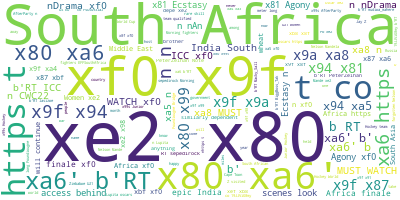

In [ ]:
# check wordcloud of raw tweets

# Join the different processed titles together.
long_string = ','.join(list(data['tweet'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
cloud =  wordcloud.to_file('uncleaned.png')
wordcloud.to_image()
